In [11]:
import pandas as pd
# read_data helper function
def read_data():
    X_dev = pd.read_csv('finalized_data/X_dev.csv')
    X_test = pd.read_csv('finalized_data/X_test.csv')
    y_dev = pd.read_csv('finalized_data/y_dev.csv')
    y_test = pd.read_csv('finalized_data/y_test.csv')
    return X_dev, X_test, y_dev, y_test

In [12]:
X_dev, X_test, y_dev, y_test = read_data()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

input_shape = X_dev.shape[1]

model = Sequential()

# First hidden layer
model.add(Dense(128, input_shape=(input_shape,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(32))
model.add(Activation('relu'))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_dev, y_dev, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
4938/4938 [==============================] - 19s 3ms/step - loss: 0.0356 - val_loss: 0.0298
Epoch 2/10
4938/4938 [==============================] - 18s 4ms/step - loss: 0.0286 - val_loss: 0.0282
Epoch 3/10
4938/4938 [==============================] - 16s 3ms/step - loss: 0.0283 - val_loss: 0.0282
Epoch 4/10
4938/4938 [==============================] - 15s 3ms/step - loss: 0.0284 - val_loss: 0.0284
Epoch 5/10
4938/4938 [==============================] - 17s 4ms/step - loss: 0.0283 - val_loss: 0.0283
Epoch 6/10
4938/4938 [==============================] - 18s 4ms/step - loss: 0.0283 - val_loss: 0.0284
Epoch 7/10
4938/4938 [==============================] - 14s 3ms/step - loss: 0.0282 - val_loss: 0.0281
Epoch 8/10
4938/4938 [==============================] - 13s 3ms/step - loss: 0.0282 - val_loss: 0.0283
Epoch 9/10
4938/4938 [==============================] - 14s 3ms/step - loss: 0.0282 - val_loss: 0.0283
Epoch 10/10
4938/4938 [==============================] - 14s 3ms/step - l

In [17]:
# evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse)


1235/1235 [==============================] - 2s 2ms/step
RMSE:  0.16524324162278256


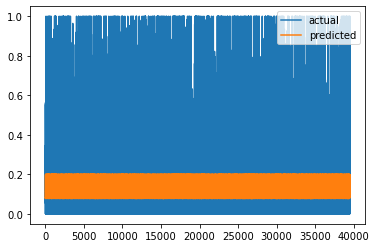

In [18]:
# visualization
import matplotlib.pyplot as plt
plt.plot(y_test, label='actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()